# 1) Data Preprocessing

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Text Classification with CNN/spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# drop unecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# New column wit labels in binary
df['bin_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['bin_labels'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33) # 33% for test

## Converte sentences to sequences

In [ ]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [ ]:
tokenizer

In [ ]:
tokenizer.fit_on_texts(x_train)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
sequences_train[0]

[5,
 493,
 116,
 106,
 3386,
 25,
 1,
 3387,
 57,
 977,
 34,
 978,
 9,
 1102,
 191,
 460,
 198,
 120,
 7,
 73,
 1103,
 14,
 2,
 226,
 12,
 52]

In [ ]:
len(sequences_train[0])

26

In [ ]:
len(sequences_train[1])

16

## Finding the vocabulary

In [ ]:
# Check number of words in vocabulary
word2idx = tokenizer.word_index
V = len(word2idx)
print("Total number of unique tokens are: %s" % V)

Total number of unique tokens are: 7178


Fix the **len** to be all equal so the neural network can accepte as a input

In [ ]:
# pad sequences (to get N x T matrix)
# N: number of samples 
# T: number of time steps
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)


Shape of data train tensor: (3733, 189)


In [ ]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
sequences_train[0]

[5,
 493,
 116,
 106,
 3386,
 25,
 1,
 3387,
 57,
 977,
 34,
 978,
 9,
 1102,
 191,
 460,
 198,
 120,
 7,
 73,
 1103,
 14,
 2,
 226,
 12,
 52]

In [ ]:
len(data_train[0])

# All record now is a vector of 189 size

189

In [ ]:
T = data_train.shape[1] # 189

In [ ]:
# pad the test set
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


# 2) Building the Model

In [ ]:
# Create the model

# Choose embedding dimensionality
D = 20  # this is a hyper paramter, we can choose any word vector size that we want

# Input layer
i = Input(shape=(T,))  # input layer takes in sequneces of integers, so shape is T

# Embedding layer
x = Embedding(V + 1, D) (i)  # This takes in sequences of integers and returns sequences of word vectors
# output is an array of N * T * D size
# + 1 because first word_index starts from 1 and not 0

# First CNN layer
x = Conv1D(32, 3, activation='relu') (x)  # 32 features that we want to extract that has 3 values wich one
x = MaxPooling1D(3) (x)

# Second CNN layer
x = Conv1D(64, 3, activation='relu') (x)
x = MaxPooling1D(3) (x)

# Third CNN layer
x = Conv1D(128, 3, activation='relu') (x)
x = GlobalMaxPooling1D() (x)

# Dense slayer
x = Dense(1, activation='sigmoid') (x) # Sigmoid because it's a binary classification problem (0 or 1)

# input and layers
model = Model(i, x)

Compile the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [ ]:
r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 3s 18ms/step - loss: 0.4731 - accuracy: 0.8547 - val_loss: 0.2794 - val_accuracy: 0.8635
Epoch 2/5
117/117 [==============================] - 2s 17ms/step - loss: 0.1985 - accuracy: 0.8937 - val_loss: 0.0990 - val_accuracy: 0.9701
Epoch 3/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0854 - val_accuracy: 0.9782
Epoch 4/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0779 - val_accuracy: 0.9793
Epoch 5/5
117/117 [==============================] - 2s 17ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0842 - val_accuracy: 0.9804


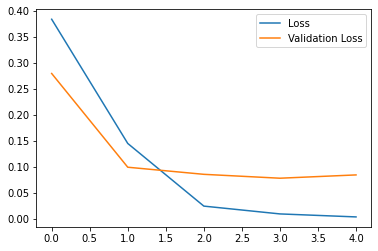

In [ ]:
# Loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

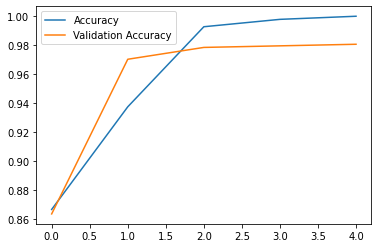

In [ ]:
# Accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()